In [37]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [38]:
os.getcwd()

'C:\\Users\\18174'

In [39]:
movie_ratings=pd.read_csv("P4-Movie-Ratings.csv")

In [40]:
movie_ratings["Genre"]=movie_ratings["Genre"].astype("category")

In [41]:
movie_ratings.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [42]:
len(movie_ratings)

559

In [43]:
movie_ratings.columns=["Film", "Genre", "Rotten_Tomatoes", "Ratings", "Budget(millions)", "year"]

In [44]:
movie_ratings.describe()

,Rotten_Tomatoes,Ratings,Budget(millions),year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [45]:
movie_ratings["Budget(millions)"].mean()

50.23613595706619

In [46]:
def spending(budget):
    if budget < 20:
        return "cheap"
    elif budget < 50:
        return "average"
    else:
        return "high budget movie"

In [47]:
movie_ratings.rename({"Budget(millions)":"budget",
                    "Rotten_Tomatoes":"RT"}, axis=1, inplace=True)

<AxesSubplot:>

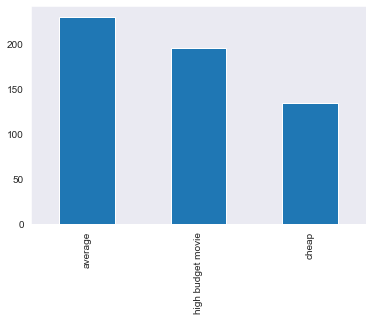

In [48]:
movie_ratings['budget'].apply(spending).value_counts().plot(kind="bar")

In [49]:
movie_ratings.isnull().any() #no null values 

Film       False
Genre      False
RT         False
Ratings    False
budget     False
year       False
dtype: bool

In [50]:
movie_ratings['Film']=movie_ratings['Film'].astype("category")

<AxesSubplot:>

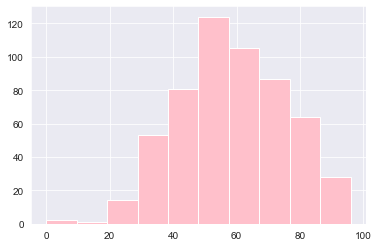

In [51]:
movie_ratings["Ratings"].hist(color='pink')

In [52]:
movie_ratings.columns

Index(['Film', 'Genre', 'RT', 'Ratings', 'budget', 'year'], dtype='object')

# Joint Plots

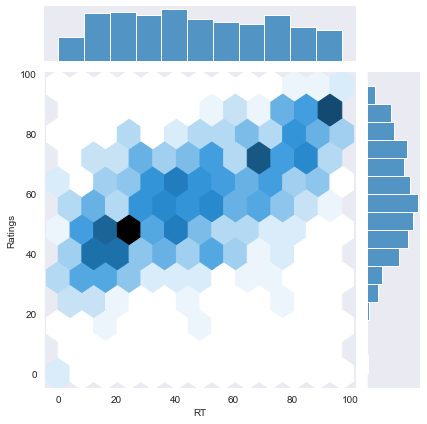

In [53]:
j=sns.jointplot(data=movie_ratings, x="RT", y="Ratings", kind="hex") #can change kind to many different parameters such as reg for regression #shows if there is relationships or dependency 

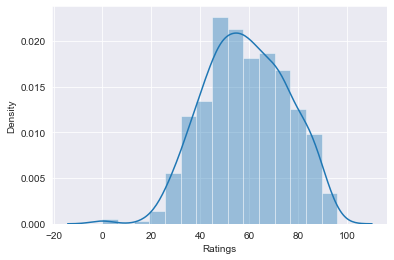

In [54]:
sns.set_style("darkgrid") #other options darkgrid,white 
n1=sns.distplot(movie_ratings['Ratings'], bins=15) #curve is more or less normally distributed 

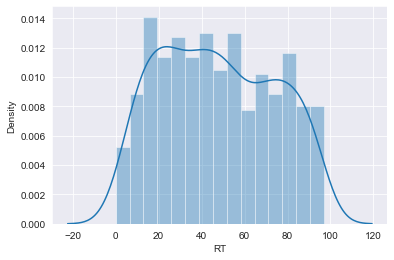

In [55]:
n2=sns.distplot(movie_ratings.RT, bins=15) #when critics use criteria to judge movies, normal distribution is lost 

# Stacked Histogram

In [56]:
movie_ratings.Genre

0         Comedy
1      Adventure
2         Action
3      Adventure
4         Comedy
         ...    
554       Comedy
555       Comedy
556     Thriller
557       Action
558       Comedy
Name: Genre, Length: 559, dtype: category
Categories (7, object): ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']

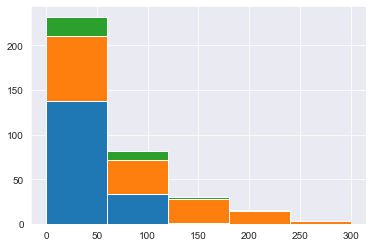

In [57]:
plt.hist( [  movie_ratings[movie_ratings['Genre']=='Comedy'].budget, \
          movie_ratings[movie_ratings['Genre']=='Action'].budget , \
         movie_ratings[movie_ratings['Genre']=='Thriller'].budget], bins=5, stacked=True)
plt.show()

In [58]:
for gen in movie_ratings['Genre'].cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


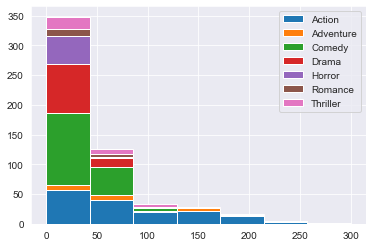

In [59]:
list1 = []
mylabels = []
for gen in movie_ratings['Genre'].cat.categories: 
    list1.append(movie_ratings[movie_ratings.Genre==gen].budget) 
    mylabels.append(gen)

h=plt.hist(list1, bins=7, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

# KDE plot

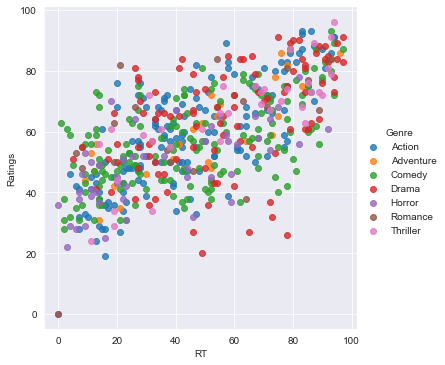

In [60]:
vis1 = sns.lmplot(data=movie_ratings, x='RT', y='Ratings', \
                  fit_reg=False, hue='Genre', size=5, aspect=1)

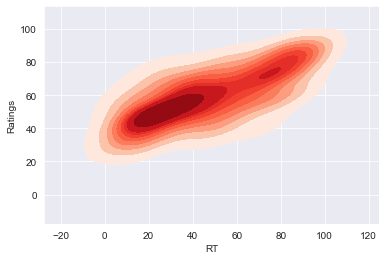

In [61]:
k1 = sns.kdeplot(movie_ratings['RT'],movie_ratings['Ratings'], \
               shade=True, shade_lowest=False, cmap="Reds") #kernel density estimate 

# Working with Subplots()

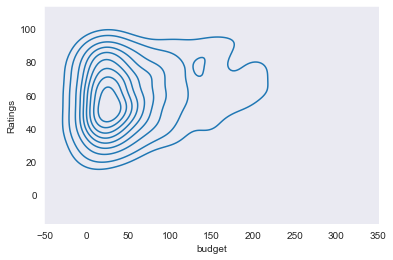

In [62]:
sns.set_style('dark')
k1 = sns.kdeplot(movie_ratings.budget, movie_ratings.Ratings) #show us whether budget of movie effects the rating

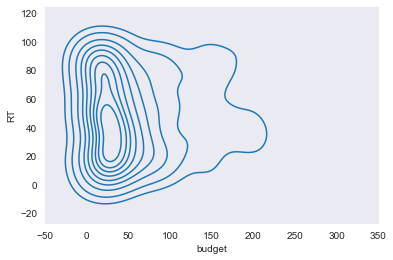

In [63]:
k2=sns.kdeplot(movie_ratings.budget, movie_ratings.RT) #Rotten tomatoes rating most concentrated between 20 and 40 mark

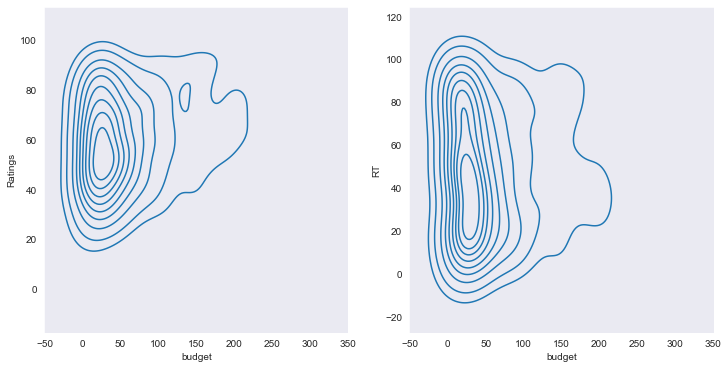

In [64]:
f, ax = plt.subplots(1, 2 ,figsize=(12, 6)) #subplots comes from pyplot in matplotlib
k1 = sns.kdeplot(movie_ratings.budget, movie_ratings.Ratings, ax = ax[0])
k2 = sns.kdeplot(movie_ratings.budget, movie_ratings.RT, a = ax[1] )#creates 1 row, 4 columns, e.g could change to whatever  #figsize how long & how high

In [65]:
#ax can be either a single axis object or an array of of axis objects 

# Violinplots Vs. Boxplots

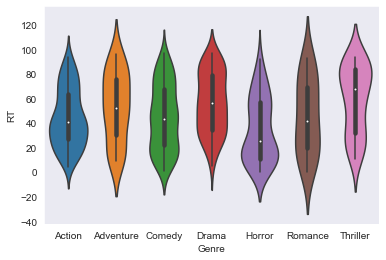

In [66]:
v=sns.violinplot(data=movie_ratings, x="Genre", y="RT") #width tells you certain number of points that fall within the area

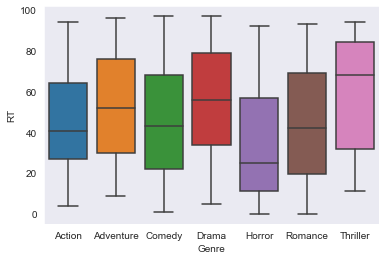

In [67]:
b=sns.boxplot(data=movie_ratings, x="Genre", y="RT") #horror movies critic ratings generally lower

# Creating a FacetGrid

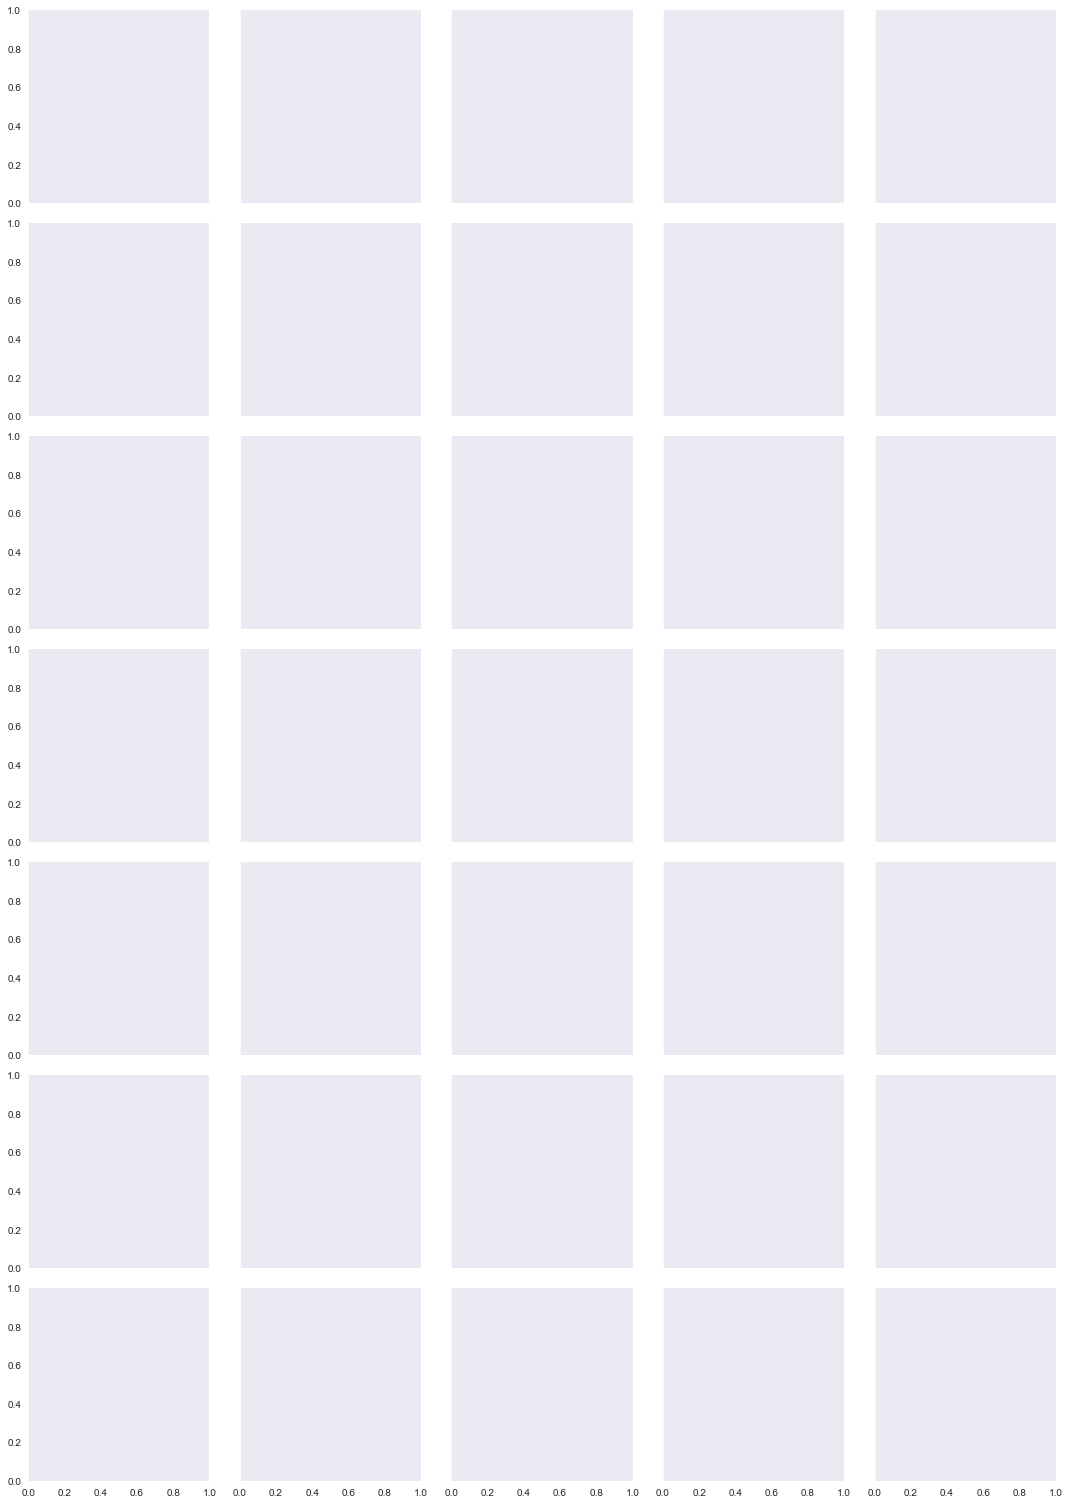

In [68]:
g = sns.FacetGrid(data = movie_ratings, row = "Genre", col = "year", hue = "Genre" ) #concept similar to subplots but dont populate 

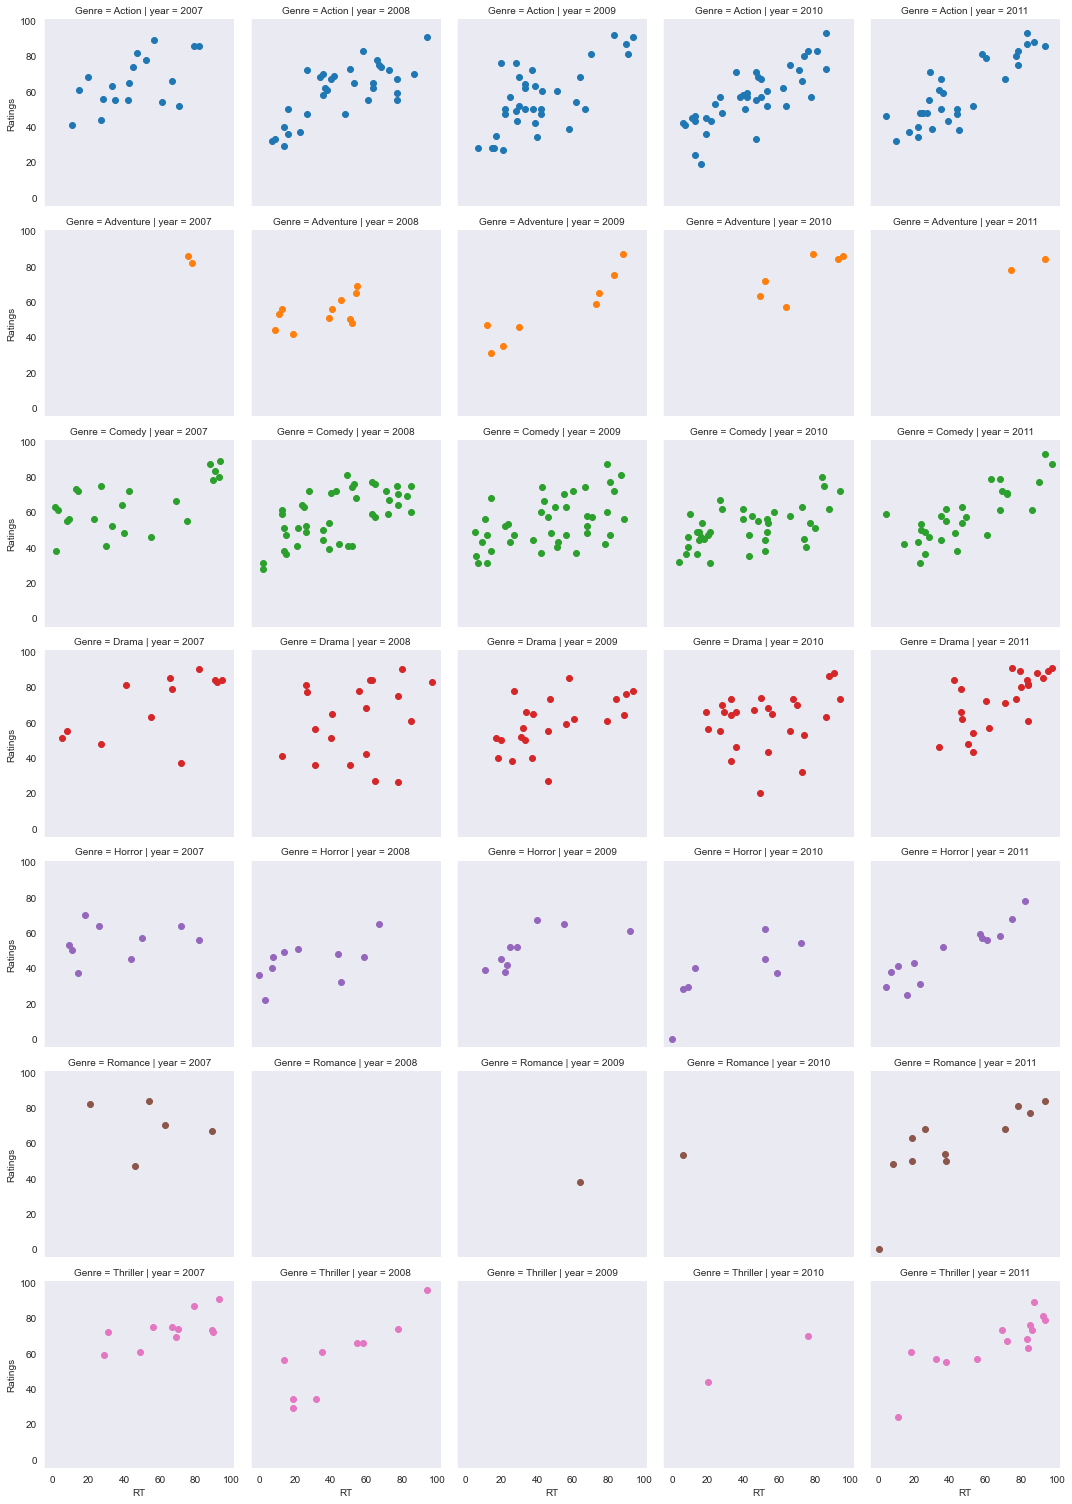

In [69]:
g = sns.FacetGrid(data = movie_ratings, row = "Genre", col = "year", hue = "Genre" ) 
g = g.map(plt.scatter, 'RT', 'Ratings')
#passing a function to g.map then passing arguements to split by years and color by genre 

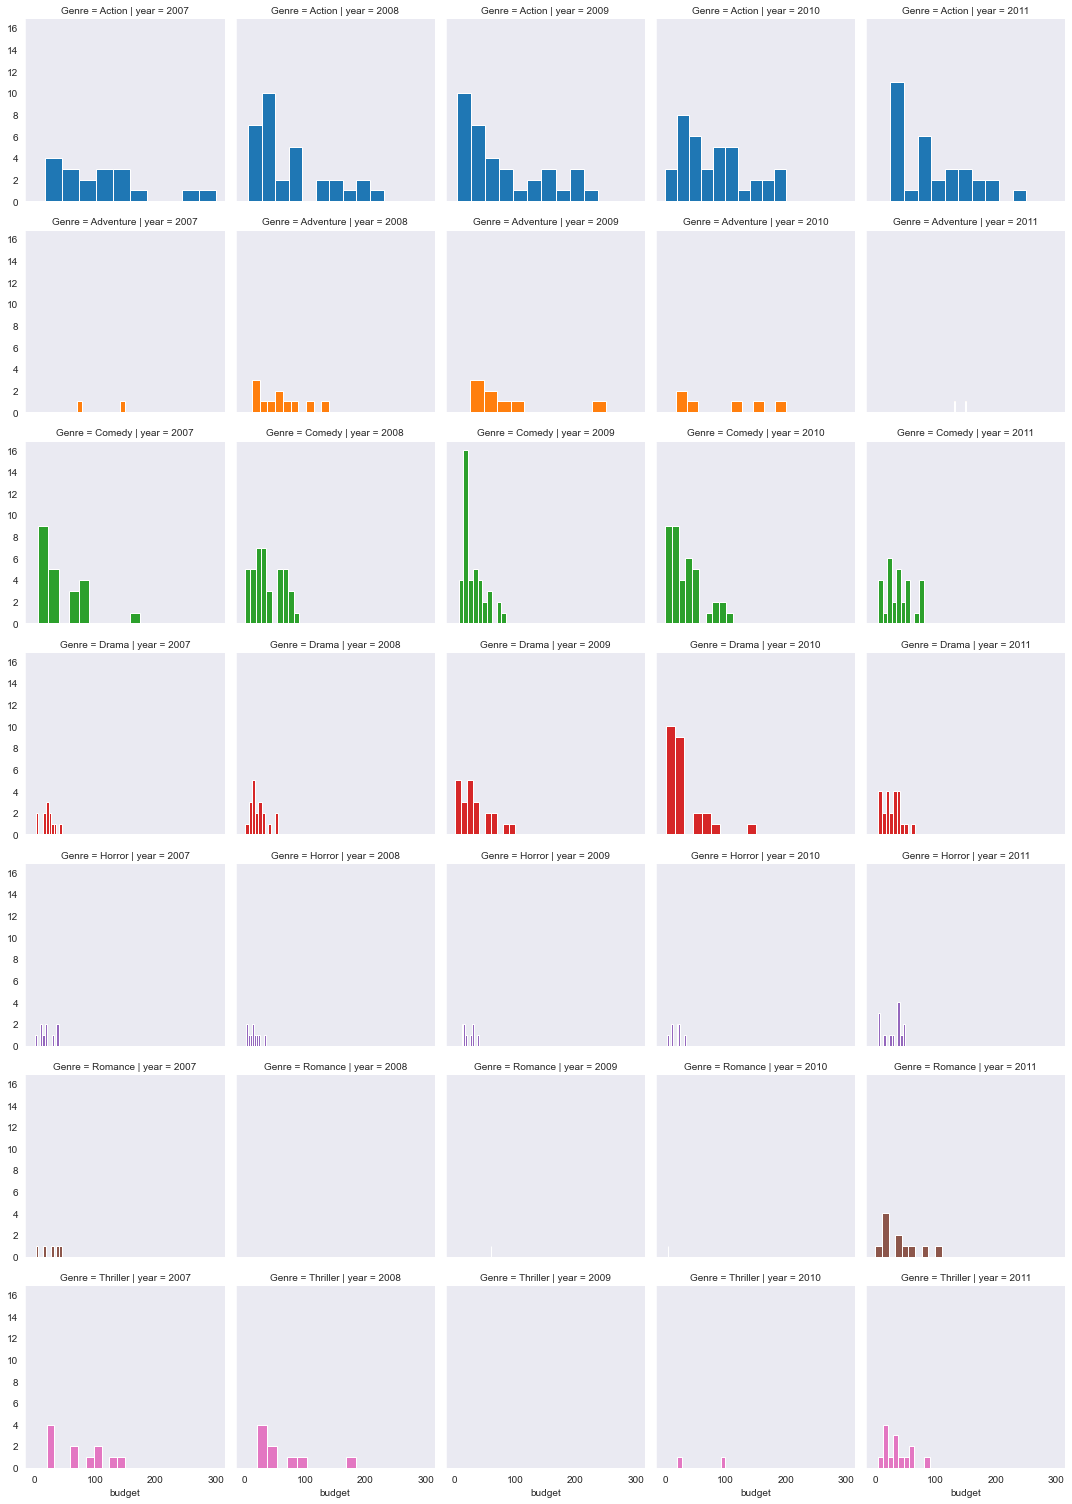

In [70]:
g = sns.FacetGrid(data = movie_ratings, row = "Genre", col = "year", hue = "Genre" ) 
g = g.map(plt.hist, 'budget')

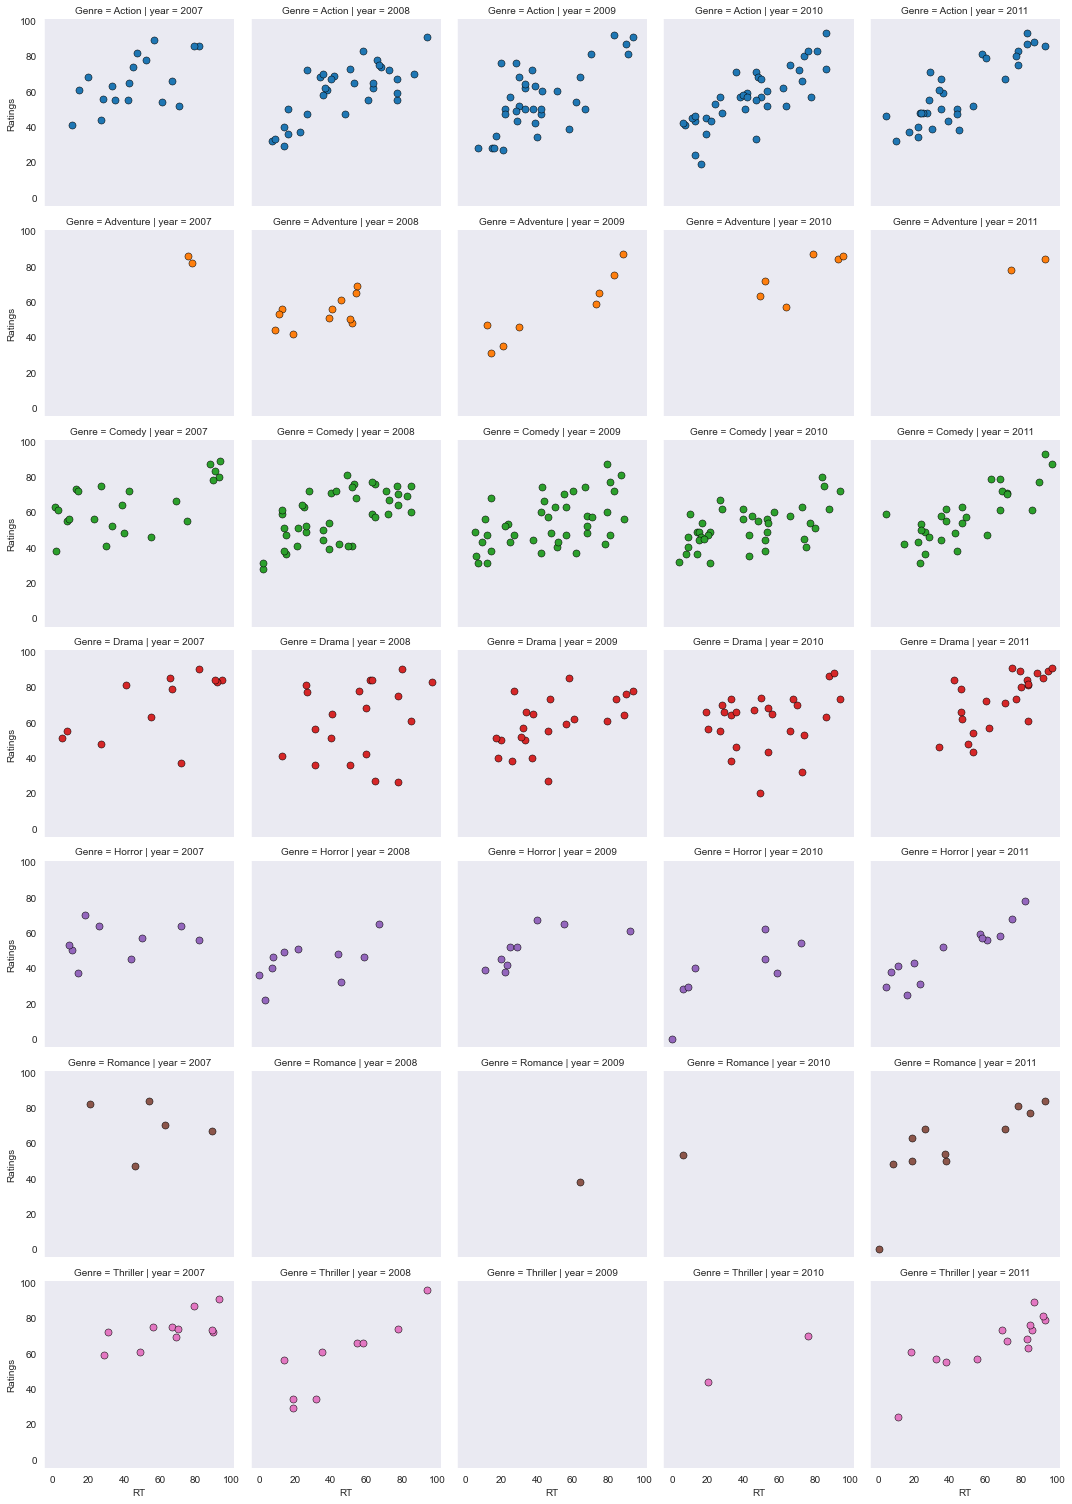

In [75]:
g = sns.FacetGrid(data = movie_ratings, row = "Genre", col = "year", hue = "Genre")
kws = dict(s = 50, linewidth = 0.5, edgecolor = "black")
g = g.map(plt.scatter, 'RT', 'Ratings', **kws)

# Coordinates and Diagonals 

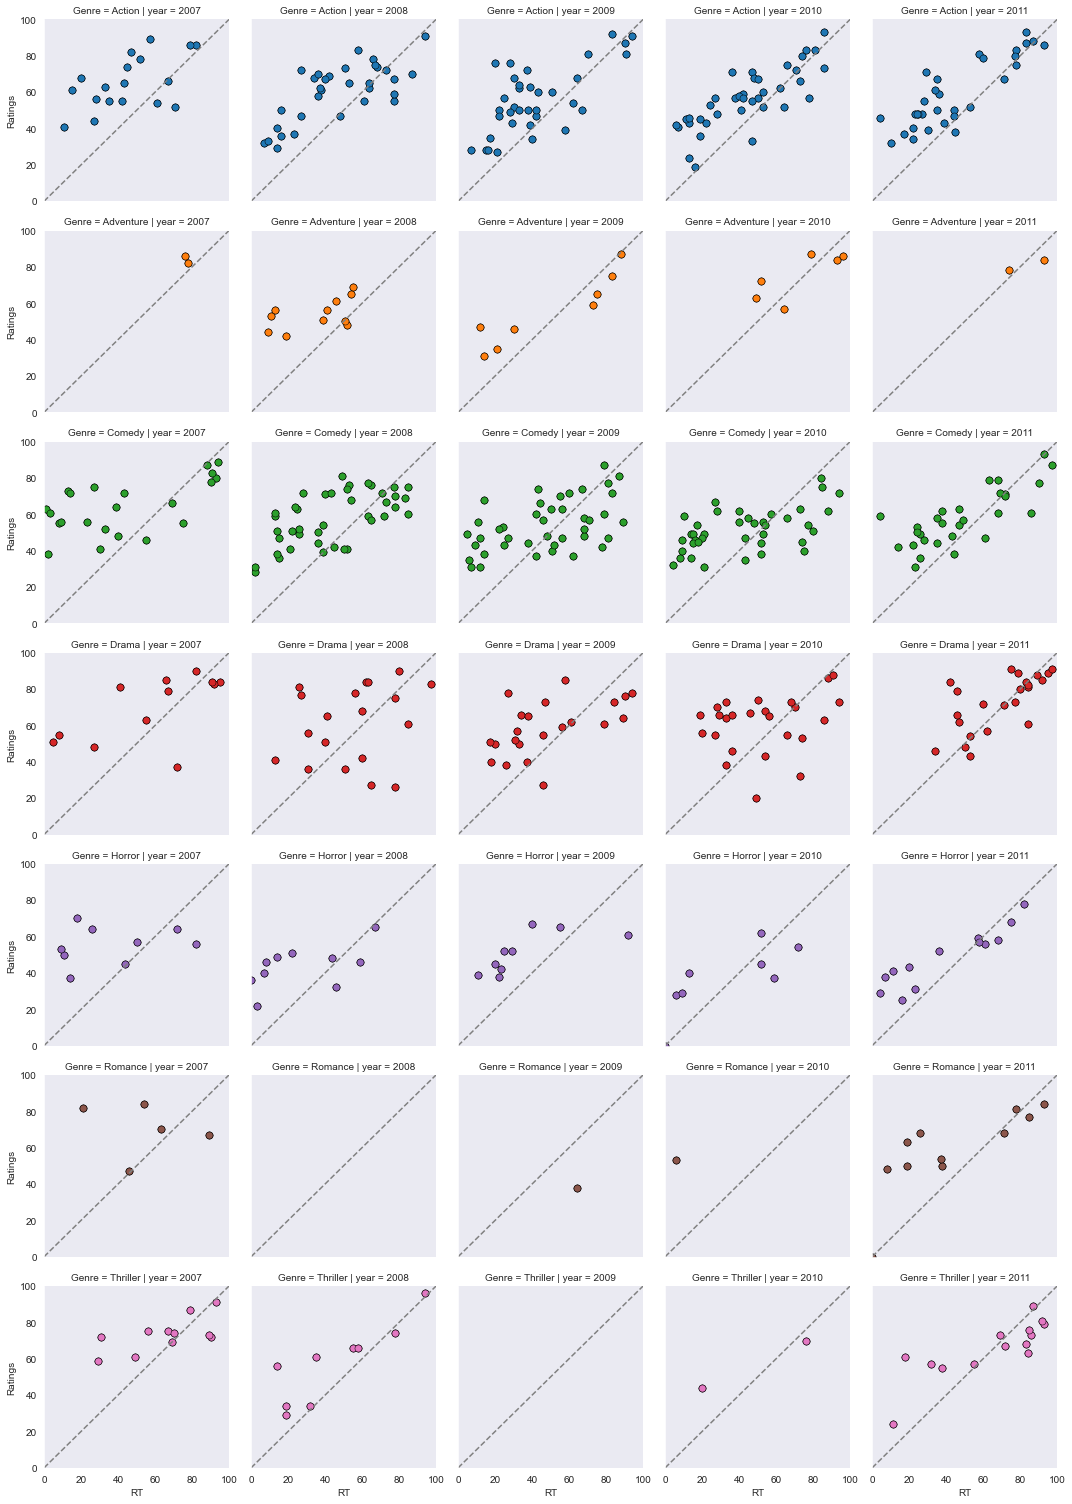

In [77]:
#controlling axis and adding diagonals 
gg = sns.FacetGrid(data = movie_ratings, row = "Genre", col = "year", hue = "Genre")
kws = dict(s = 50, linewidth = 0.5, edgecolor = "black")
g = g.map(plt.scatter, 'RT', 'Ratings', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c = "gray", ls="--")

# Building Dashboards

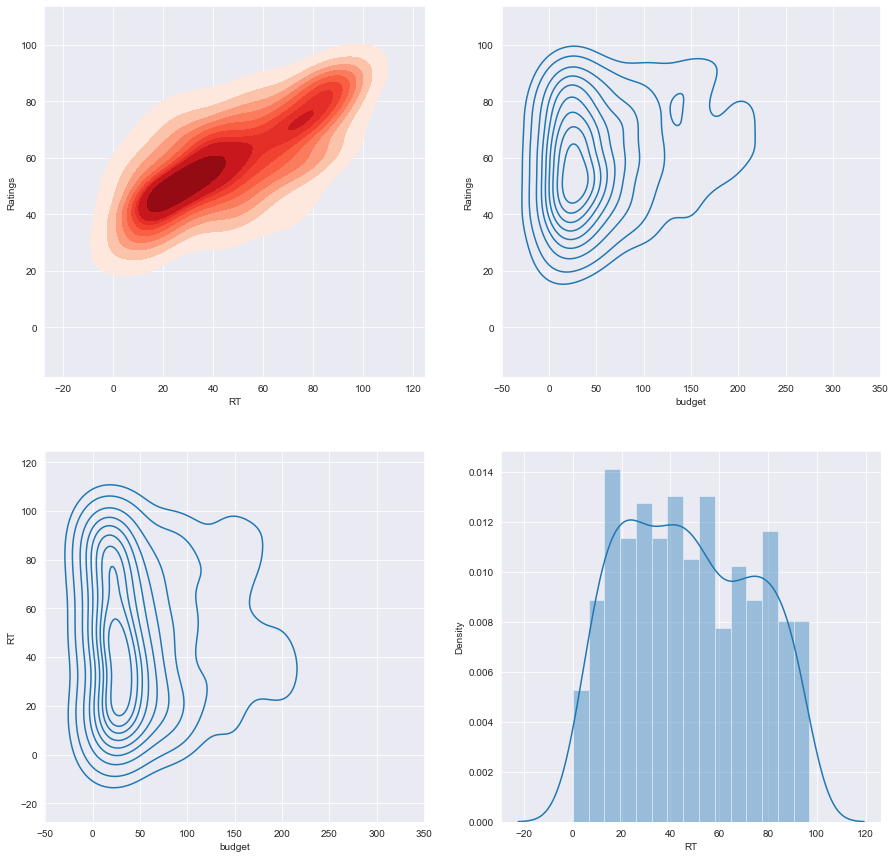

In [114]:
sns.set_style('darkgrid')
f, ax = plt.subplots(2,2, figsize = (15,15)) #f is figure, axes is the axes
k1 = sns.kdeplot(movie_ratings.budget, movie_ratings.Ratings, \
                 ax = ax[0,1])
k2 = sns.kdeplot(movie_ratings.budget, movie_ratings.RT, \
                 ax = ax[1,0] )
kd = sns.kdeplot(movie_ratings['RT'],movie_ratings['Ratings'], \
               shade=True, shade_lowest=False, cmap="Reds", \
                 ax = ax[0,0]) 
n2=sns.distplot(movie_ratings.RT, bins=15, ax = ax[1,1])

